In [ ]:
#Part 1: Web Scraping

In [1]:
import requests

In [2]:
#standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"
standings_url = "https://fbref.com/en/comps/9/2023-2024/2023-2024-Premier-League-Stats"

In [3]:
data = requests.get(standings_url)

'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="" lang="en" class="no-js" >\n<head id="suppress_all_ads">\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n\n    <title>Rate Limited Request (429 error) | Sports-Reference.com</title>\n\n    <link rel="canonical" href="https://www.sports-reference.com/429.html" />\n\n<!-- CSS start -->\n <style>body,html{color:#000;font:14px/1.25 Helvetica Neue,helvetica,arial,sans-serif;margin:0;padding:0}html:not(.backstop){scroll-behavior:smooth}html:not(.backstop) div,html:not(.backstop) span{scroll-snap-margin:2.5em 0 0 0;scroll-margin:2.5em 0 0 0}body{-webkit-text-size-adjust:none;-moz-text-size-adjust:none;-ms-text-size-adjust:none;background:#c9cbcd;position:relative;z-index:0}a img{border:0}li,ol,ul{list-style-type:none;margin:0;padding:0}table td,table th{border:0}iframe{max-width:100%}code{backgroun
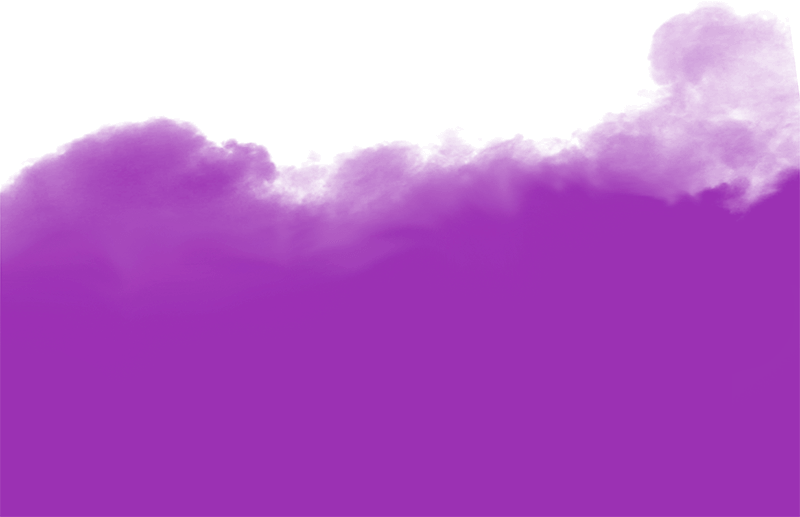

In [4]:
data.text

In [5]:
from bs4 import BeautifulSoup

In [6]:
soup = BeautifulSoup(data.text)

In [7]:
standings_table = soup.select('table.stats_table')[0]

IndexError: list index out of range

In [ ]:
standings_table

In [ ]:
links = standings_table.find_all('a')

In [ ]:
links = [l.get("href") for l in links]

In [ ]:
links = [l for l in links if '/squads/' in l]

In [ ]:
team_urls = [f"https://fbref.com{l}" for l in links]

In [ ]:
team_urls

In [ ]:
team_url = team_urls[0]

In [ ]:
team_url

In [ ]:
data = requests.get(team_url)

In [ ]:
import pandas as pd

In [ ]:
from io import StringIO

data_string = data.text
data_io = StringIO(data_string)

matches = pd.read_html(data_io, match="Scores & Fixtures")

In [ ]:
matches[0]

In [ ]:
soup = BeautifulSoup(data.text)

In [ ]:
links = soup.find_all('a')

In [ ]:
links = [l.get("href") for l in links]

In [ ]:
links

In [ ]:
links = [l for l in links if l and 'all_comps/shooting/' in l]

In [ ]:
links[0]

In [ ]:
data = requests.get(f"https://fbref.com{links[0]}")

In [ ]:
from io import StringIO

data_string = data.text
data_io = StringIO(data_string)

shooting = pd.read_html(data_io, match="Shooting")[0]

In [ ]:
shooting.head()

In [ ]:
shooting.columns = shooting.columns.droplevel()

In [ ]:
shooting.head()

In [ ]:
team_data = matches[0].merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")

In [ ]:
matches[0].shape

In [19]:
years = list(range(2024, 2020, -1))

In [20]:
all_matches = []

In [21]:
#standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"
standings_url = "https://fbref.com/en/comps/9/2023-2024/2023-2024-Premier-League-Stats"

<!DOCTYPE html>
<html class="no-js" data-root="" data-version="klecko-" lang="en">
<head id="suppress_all_ads">
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
<title>Rate Limited Request (429 error) | Sports-Reference.com</title>
<link href="https://www.sports-reference.com/429.html" rel="canonical"/>
<!-- CSS start -->
<style>body,html{color:#000;font:14px/1.25 Helvetica Neue,helvetica,arial,sans-serif;margin:0;padding:0}html:not(.backstop){scroll-behavior:smooth}html:not(.backstop) div,html:not(.backstop) span{scroll-snap-margin:2.5em 0 0 0;scroll-margin:2.5em 0 0 0}body{-webkit-text-size-adjust:none;-moz-text-size-adjust:none;-ms-text-size-adjust:none;background:#c9cbcd;position:relative;z-index:0}a img{border:0}li,ol,ul{list-style-type:none;margin:0;padding:0}table td,table th{border:0}iframe{max-width:100%}code{background:#eee}a,button,input,label,select,summa
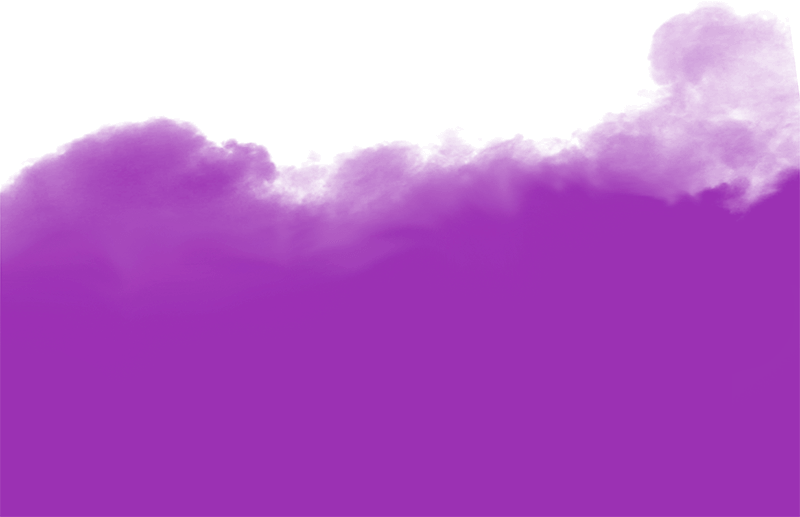

IndexError: list index out of range

In [22]:
import time
for year in years:
    data = requests.get(standings_url)
    soup = BeautifulSoup(data.text)
    print(soup)
    standings_table = soup.select('table.stats_table')[0]

    links = [l.get("href") for l in standings_table.find_all('a')]
    links = [l for l in links if '/squads/' in l]
    team_urls = [f"https://fbref.com{l}" for l in links]

    previous_season = soup.select("a.prev")[0].get("href")
    standings_url = f"https://fbref.com{previous_season}"
    
    for team_url in team_urls:
        team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")

        data = requests.get(team_url)
        matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
        soup = BeautifulSoup(data.text)
        links = [l.get("href") for l in soup.find_all('a')]
        links = [l for l in links if l and 'all_comps/shooting/' in l]
        data = requests.get(f"https://fbref.com{links[0]}")
        shooting = pd.read_html(data.text, match="Shooting")[0]
        shooting.columns = shooting.columns.droplevel()

        try:
            team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]])
        except ValueError:
            continue

        team_data = team_data[team_data["Comp"] == "Premier League"]
        print(year)
        team_data["Season"] = year
        team_data["Team"] = team_name
        all_matches.append(team_data)
        time.sleep(1)

In [ ]:
match_df = pd.concat(all_matches)

In [ ]:
match_df

In [ ]:
match_df.columns = [c.lower() for c in match_df.columns]

In [ ]:
match_df.to_csv("matches.csv")

In [8]:
# Part 2: Machine Learning Model

In [2]:
import pandas as pd

In [3]:
matches = pd.read_csv("matches.csv", index_col=0)

In [4]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,Match Report,NaN,17.0,8.0,13.9,0.0,0,0,2024,Manchester City
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,Match Report,NaN,14.0,4.0,17.9,0.0,0,0,2024,Manchester City
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,Match Report,NaN,29.0,9.0,17.3,2.0,0,1,2024,Manchester City
5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,...,Match Report,NaN,6.0,4.0,14.8,0.0,1,1,2024,Manchester City
6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,...,Match Report,NaN,29.0,13.0,16.4,1.0,0,0,2024,Manchester City


In [5]:
matches.shape

(266, 27)

In [6]:
matches["team"].value_counts()

team
Manchester City      38
Arsenal              38
Liverpool            38
Aston Villa          38
Tottenham Hotspur    38
Chelsea              38
Newcastle United     38
Name: count, dtype: int64

In [7]:
matches["round"].value_counts()

round
Matchweek 1     7
Matchweek 30    7
Matchweek 23    7
Matchweek 24    7
Matchweek 25    7
Matchweek 18    7
Matchweek 26    7
Matchweek 27    7
Matchweek 28    7
Matchweek 31    7
Matchweek 2     7
Matchweek 32    7
Matchweek 33    7
Matchweek 29    7
Matchweek 35    7
Matchweek 36    7
Matchweek 37    7
Matchweek 34    7
Matchweek 22    7
Matchweek 21    7
Matchweek 20    7
Matchweek 19    7
Matchweek 3     7
Matchweek 4     7
Matchweek 5     7
Matchweek 6     7
Matchweek 7     7
Matchweek 8     7
Matchweek 9     7
Matchweek 10    7
Matchweek 11    7
Matchweek 12    7
Matchweek 13    7
Matchweek 14    7
Matchweek 15    7
Matchweek 16    7
Matchweek 17    7
Matchweek 38    7
Name: count, dtype: int64

In [8]:
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf                int64
ga                int64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

In [9]:
matches["date"] = pd.to_datetime(matches["date"])

In [10]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,Match Report,NaN,17.0,8.0,13.9,0.0,0,0,2024,Manchester City
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,Match Report,NaN,14.0,4.0,17.9,0.0,0,0,2024,Manchester City
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,Match Report,NaN,29.0,9.0,17.3,2.0,0,1,2024,Manchester City
5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,...,Match Report,NaN,6.0,4.0,14.8,0.0,1,1,2024,Manchester City
6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,...,Match Report,NaN,29.0,13.0,16.4,1.0,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,2024-04-27,15:00,Premier League,Matchweek 35,Sat,Home,W,5,1,Sheffield Utd,...,Match Report,NaN,19.0,6.0,16.0,0.0,1,1,2024,Newcastle United
47,2024-05-04,15:00,Premier League,Matchweek 36,Sat,Away,W,4,1,Burnley,...,Match Report,NaN,22.0,10.0,17.6,1.0,0,1,2024,Newcastle United
48,2024-05-11,15:00,Premier League,Matchweek 37,Sat,Home,D,1,1,Brighton,...,Match Report,NaN,18.0,7.0,15.8,0.0,0,0,2024,Newcastle United
49,2024-05-15,20:00,Premier League,Matchweek 34,Wed,Away,L,2,3,Manchester Utd,...,Match Report,NaN,21.0,7.0,14.6,0.0,0,0,2024,Newcastle United


In [11]:
matches.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                       int64
ga                       int64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                       int64
pkatt                    int64
season                   int64
team                    object
dtype: object

In [12]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes

In [14]:
matches["opp_code"] = matches["opponent"].astype("category").cat.codes

In [16]:
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")

In [18]:
matches["day_code"] = matches["date"].dt.dayofweek

In [19]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,13.9,0.0,0,0,2024,Manchester City,0,5,20,4
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,17.9,0.0,0,0,2024,Manchester City,1,14,20,5
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,17.3,2.0,0,1,2024,Manchester City,0,16,14,6
5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,...,14.8,0.0,1,1,2024,Manchester City,1,9,15,5
6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,...,16.4,1.0,0,0,2024,Manchester City,0,18,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,2024-04-27,15:00,Premier League,Matchweek 35,Sat,Home,W,5,1,Sheffield Utd,...,16.0,0.0,1,1,2024,Newcastle United,1,16,15,5
47,2024-05-04,15:00,Premier League,Matchweek 36,Sat,Away,W,4,1,Burnley,...,17.6,1.0,0,1,2024,Newcastle United,0,5,15,5
48,2024-05-11,15:00,Premier League,Matchweek 37,Sat,Home,D,1,1,Brighton,...,15.8,0.0,0,0,2024,Newcastle United,1,4,15,5
49,2024-05-15,20:00,Premier League,Matchweek 34,Wed,Away,L,2,3,Manchester Utd,...,14.6,0.0,0,0,2024,Newcastle United,0,13,20,2


In [20]:
matches["target"] = (matches["result"] == "W").astype("int")

In [21]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,0.0,0,0,2024,Manchester City,0,5,20,4,1
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,0.0,0,0,2024,Manchester City,1,14,20,5,1
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,2.0,0,1,2024,Manchester City,0,16,14,6,1
5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,...,0.0,1,1,2024,Manchester City,1,9,15,5,1
6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,...,1.0,0,0,2024,Manchester City,0,18,15,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,2024-04-27,15:00,Premier League,Matchweek 35,Sat,Home,W,5,1,Sheffield Utd,...,0.0,1,1,2024,Newcastle United,1,16,15,5,1
47,2024-05-04,15:00,Premier League,Matchweek 36,Sat,Away,W,4,1,Burnley,...,1.0,0,1,2024,Newcastle United,0,5,15,5,1
48,2024-05-11,15:00,Premier League,Matchweek 37,Sat,Home,D,1,1,Brighton,...,0.0,0,0,2024,Newcastle United,1,4,15,5,0
49,2024-05-15,20:00,Premier League,Matchweek 34,Wed,Away,L,2,3,Manchester Utd,...,0.0,0,0,2024,Newcastle United,0,13,20,2,0


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [24]:
train = matches[matches["date"] < '2024-01-01']

In [25]:
test = matches[matches["date"] > '2024-01-01']

In [26]:
predictors = ["venue_code", "opp_code", "hour", "day_code"]

In [27]:
rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [28]:
preds = rf.predict(test[predictors])

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
acc = accuracy_score(test["target"], preds)

In [32]:
acc #winrate

0.5669291338582677

In [34]:
combined = pd.DataFrame(dict(actual=test["target"], prediction=preds))

In [38]:
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,22,28
1,27,50


In [39]:
from sklearn.metrics import precision_score

In [41]:
precision_score(test["target"], preds) #when we predicted a win, they won that percent of time

0.6410256410256411

In [43]:
grouped_matches = matches.groupby("team")

In [45]:
group = grouped_matches.get_group("Manchester City")

In [46]:
group

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,0.0,0,0,2024,Manchester City,0,5,20,4,1
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,0.0,0,0,2024,Manchester City,1,14,20,5,1
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,2.0,0,1,2024,Manchester City,0,16,14,6,1
5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,...,0.0,1,1,2024,Manchester City,1,9,15,5,1
6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,...,1.0,0,0,2024,Manchester City,0,18,15,5,1
8,2023-09-23,15:00,Premier League,Matchweek 6,Sat,Home,W,2,0,Nott'ham Forest,...,2.0,0,0,2024,Manchester City,1,15,15,5,1
10,2023-09-30,15:00,Premier League,Matchweek 7,Sat,Away,L,1,2,Wolves,...,1.0,0,0,2024,Manchester City,0,19,15,5,0
12,2023-10-08,16:30,Premier League,Matchweek 8,Sun,Away,L,0,1,Arsenal,...,0.0,0,0,2024,Manchester City,0,0,16,6,0
13,2023-10-21,15:00,Premier League,Matchweek 9,Sat,Home,W,2,1,Brighton,...,1.0,0,0,2024,Manchester City,1,4,15,5,1
15,2023-10-29,15:30,Premier League,Matchweek 10,Sun,Away,W,3,0,Manchester Utd,...,2.0,1,1,2024,Manchester City,0,13,15,6,1


In [47]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [48]:
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

In [49]:
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [50]:
rolling_averages(group, cols, new_cols)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,...,5,1,2.000000,0.333333,20.000000,7.000000,16.366667,0.666667,0.000000,0.333333
6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,...,5,1,2.666667,0.666667,16.333333,5.666667,16.666667,0.666667,0.333333,0.666667
8,2023-09-23,15:00,Premier League,Matchweek 6,Sat,Home,W,2,0,Nott'ham Forest,...,5,1,3.333333,1.000000,21.333333,8.666667,16.166667,1.000000,0.333333,0.666667
10,2023-09-30,15:00,Premier League,Matchweek 7,Sat,Away,L,1,2,Wolves,...,5,0,3.333333,0.666667,14.000000,7.000000,16.133333,1.000000,0.333333,0.333333
12,2023-10-08,16:30,Premier League,Matchweek 8,Sun,Away,L,0,1,Arsenal,...,6,0,2.000000,1.000000,19.666667,8.333333,17.633333,1.333333,0.000000,0.000000
13,2023-10-21,15:00,Premier League,Matchweek 9,Sat,Home,W,2,1,Brighton,...,5,1,1.000000,1.000000,11.333333,4.000000,17.133333,1.000000,0.000000,0.000000
15,2023-10-29,15:30,Premier League,Matchweek 10,Sun,Away,W,3,0,Manchester Utd,...,6,1,1.000000,1.333333,12.333333,4.333333,17.666667,0.666667,0.000000,0.000000
16,2023-11-04,15:00,Premier League,Matchweek 11,Sat,Home,W,6,1,Bournemouth,...,5,1,1.666667,0.666667,11.333333,4.666667,16.966667,1.000000,0.333333,0.333333
18,2023-11-12,16:30,Premier League,Matchweek 12,Sun,Away,D,4,4,Chelsea,...,6,0,3.666667,0.666667,17.000000,7.333333,17.466667,1.000000,0.333333,0.333333
19,2023-11-25,12:30,Premier League,Matchweek 13,Sat,Home,D,1,1,Liverpool,...,5,0,4.333333,1.666667,18.333333,8.666667,16.733333,1.000000,0.666667,0.666667


In [51]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

C:\Users\Bruno\AppData\Local\Temp\ipykernel_360\4052147919.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))


In [52]:
matches_rolling

date   time            comp         round  day  \
team                                                                        
Arsenal           4  2023-09-03  16:30  Premier League   Matchweek 4  Sun   
                  5  2023-09-17  16:30  Premier League   Matchweek 5  Sun   
                  7  2023-09-24  14:00  Premier League   Matchweek 6  Sun   
                  9  2023-09-30  15:00  Premier League   Matchweek 7  Sat   
                  11 2023-10-08  16:30  Premier League   Matchweek 8  Sun   
...                         ...    ...             ...           ...  ...   
Tottenham Hotspur 36 2024-05-02  19:30  Premier League  Matchweek 26  Thu   
                  37 2024-05-05  16:30  Premier League  Matchweek 36  Sun   
                  38 2024-05-11  15:00  Premier League  Matchweek 37  Sat   
                  39 2024-05-14  20:00  Premier League  Matchweek 34  Tue   
                  40 2024-05-19  16:00  Premier League  Matchweek 38  Sun   

                     venue result  gf  ga         opponent  ...  day_code  \
team                                                        ...             
Arsenal           4   Home      W   3   1   Manchester Utd  ...         6   
                  5   Away      W   1   0          Everton  ...         6   
                  7   Home      D   2   2        Tottenham  ...         6   
                  9   Away      W   4   0      Bournemouth  ...         5   
                  11  Home      W   1   0  Manchester City  ...         6   
...                    ...    ...  ..  ..              ...  ...       ...   
Tottenham Hotspur 36  Away      L   0   2          Chelsea  ...         3   
                  37  Away      L   2   4        Liverpool  ...         6   
                  38  Home      W   2   1          Burnley  ...         5   
                  39  Home      L   0   2  Manchester City  ...         1   
                  40  Away      W   3   0    Sheffield Utd  ...         6   

                      target  gf_rolling  ga_rolling sh_rolling sot_rolling  \
team                                                                          
Arsenal           4        1    1.666667    1.000000  15.333333    6.000000   
                  5        1    2.000000    1.000000  16.000000    5.333333   
                  7        0    2.000000    1.000000  16.000000    6.000000   
                  9        1    2.000000    1.000000  14.000000    4.333333   
                  11       1    2.333333    0.666667  12.666667    4.666667   
...                      ...         ...         ...        ...         ...   
Tottenham Hotspur 36       0    1.666667    2.666667  14.000000    3.333333   
                  37       0    0.666667    3.000000  14.666667    2.000000   
                  38       1    1.333333    3.000000  14.666667    3.333333   
                  39       0    1.333333    2.333333  17.000000    6.000000   
                  40       1    1.333333    2.333333  14.000000    6.666667   

                     dist_rolling fk_rolling  pk_rolling  pkatt_rolling  
team                                                                     
Arsenal           4     16.433333   0.000000    0.666667       0.666667  
                  5     15.066667   0.000000    0.666667       0.666667  
                  7     15.400000   0.000000    0.333333       0.333333  
                  9     16.433333   0.000000    0.333333       0.333333  
                  11    16.600000   0.000000    1.000000       1.000000  
...                           ...        ...         ...            ...  
Tottenham Hotspur 36    18.666667   0.333333    0.333333       0.333333  
                  37    17.566667   0.000000    0.333333       0.333333  
                  38    18.433333   0.333333    0.333333       0.333333  
                  39    18.166667   0.333333    0.000000       0.000000  
                  40    17.533333   0.333333    0.000000       0.000000  

[245 rows x 40 columns]

In [53]:
matches_rolling = matches_rolling.droplevel('team')

In [54]:
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3,1,Manchester Utd,...,6,1,1.666667,1.000000,15.333333,6.000000,16.433333,0.000000,0.666667,0.666667
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1,0,Everton,...,6,1,2.000000,1.000000,16.000000,5.333333,15.066667,0.000000,0.666667,0.666667
7,2023-09-24,14:00,Premier League,Matchweek 6,Sun,Home,D,2,2,Tottenham,...,6,0,2.000000,1.000000,16.000000,6.000000,15.400000,0.000000,0.333333,0.333333
9,2023-09-30,15:00,Premier League,Matchweek 7,Sat,Away,W,4,0,Bournemouth,...,5,1,2.000000,1.000000,14.000000,4.333333,16.433333,0.000000,0.333333,0.333333
11,2023-10-08,16:30,Premier League,Matchweek 8,Sun,Home,W,1,0,Manchester City,...,6,1,2.333333,0.666667,12.666667,4.666667,16.600000,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,2024-05-02,19:30,Premier League,Matchweek 26,Thu,Away,L,0,2,Chelsea,...,3,0,1.666667,2.666667,14.000000,3.333333,18.666667,0.333333,0.333333,0.333333
37,2024-05-05,16:30,Premier League,Matchweek 36,Sun,Away,L,2,4,Liverpool,...,6,0,0.666667,3.000000,14.666667,2.000000,17.566667,0.000000,0.333333,0.333333
38,2024-05-11,15:00,Premier League,Matchweek 37,Sat,Home,W,2,1,Burnley,...,5,1,1.333333,3.000000,14.666667,3.333333,18.433333,0.333333,0.333333,0.333333
39,2024-05-14,20:00,Premier League,Matchweek 34,Tue,Home,L,0,2,Manchester City,...,1,0,1.333333,2.333333,17.000000,6.000000,18.166667,0.333333,0.000000,0.000000


In [58]:
def make_predictions(data, predictors):
    train = data[data["date"] < '2024-01-01']
    test = data[data["date"] > '2024-01-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    precision = precision_score(test["target"], preds)
    return combined, precision

In [59]:
combined, precision = make_predictions(matches_rolling, predictors + new_cols)

In [60]:
precision

0.5757575757575758

In [61]:
combined

,actual,predicted
30,1,1
31,1,1
32,1,1
33,1,1
34,1,0
...,...,...
36,0,0
37,0,0
38,1,1
39,0,1


In [64]:
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)

In [65]:
combined

,actual,predicted,date,team,opponent,result
30,1,1,2024-01-20,Arsenal,Crystal Palace,W
30,1,1,2024-01-14,Aston Villa,Everton,D
30,1,1,2024-02-04,Chelsea,Wolves,L
30,1,1,2024-01-13,Newcastle United,Manchester City,L
30,1,1,2024-03-16,Tottenham Hotspur,Fulham,L
...,...,...,...,...,...,...
39,0,1,2024-05-14,Tottenham Hotspur,Manchester City,L
40,1,0,2024-03-31,Arsenal,Manchester City,D
40,1,0,2024-03-10,Aston Villa,Tottenham,L
40,1,0,2024-04-04,Chelsea,Manchester Utd,W


In [70]:
class MissingDict(dict):
    __missing__ = lambda self, key: key

map_values = {
    "Brighton and Hove Albion": "Brighton", 
    "Manchester United": "Manchester Utd", 
    "Newcastle United": "Newcastle Utd", 
    "Tottenham Hotspur": "Tottenham", 
    "West Ham United": "West Ham", 
    "Wolverhampton Wanderers": "Wolves"
}
mapping = MissingDict(**map_values)

In [71]:
mapping["Arsenal"]

'Arsenal'

In [72]:
mapping["West Ham United"]

'West Ham'

In [73]:
combined["new_team"] = combined["team"].map(mapping)

In [74]:
combined

,actual,predicted,date,team,opponent,result,new_team
30,1,1,2024-01-20,Arsenal,Crystal Palace,W,Arsenal
30,1,1,2024-01-14,Aston Villa,Everton,D,Aston Villa
30,1,1,2024-02-04,Chelsea,Wolves,L,Chelsea
30,1,1,2024-01-13,Newcastle United,Manchester City,L,Newcastle Utd
30,1,1,2024-03-16,Tottenham Hotspur,Fulham,L,Tottenham
...,...,...,...,...,...,...,...
39,0,1,2024-05-14,Tottenham Hotspur,Manchester City,L,Tottenham
40,1,0,2024-03-31,Arsenal,Manchester City,D,Arsenal
40,1,0,2024-03-10,Aston Villa,Tottenham,L,Aston Villa
40,1,0,2024-04-04,Chelsea,Manchester Utd,W,Chelsea


In [76]:
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])

In [77]:
merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,1,1,2024-01-13,Newcastle United,Manchester City,L,Newcastle Utd,0,1,Manchester City,Newcastle Utd,W,Manchester City
1,1,1,2024-01-13,Newcastle United,Manchester City,L,Newcastle Utd,1,1,Manchester City,Newcastle Utd,W,Manchester City
2,1,1,2024-01-13,Newcastle United,Manchester City,L,Newcastle Utd,1,0,Manchester City,Newcastle Utd,W,Manchester City
3,1,1,2024-02-04,Arsenal,Liverpool,W,Arsenal,0,1,Liverpool,Arsenal,L,Liverpool
4,1,1,2024-02-04,Arsenal,Liverpool,W,Arsenal,0,0,Liverpool,Arsenal,L,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,1,0,2024-03-31,Arsenal,Manchester City,D,Arsenal,0,0,Manchester City,Arsenal,D,Manchester City
916,1,0,2024-03-31,Arsenal,Manchester City,D,Arsenal,1,0,Manchester City,Arsenal,D,Manchester City
917,1,0,2024-03-10,Aston Villa,Tottenham,L,Aston Villa,0,1,Tottenham Hotspur,Aston Villa,W,Tottenham
918,1,0,2024-03-10,Aston Villa,Tottenham,L,Aston Villa,1,1,Tottenham Hotspur,Aston Villa,W,Tottenham


In [78]:
merged[(merged["predicted_x"] == 1) & (merged["predicted_y"] == 0)]["actual_x"].value_counts()

actual_x
1    120
0    106
Name: count, dtype: int64

In [81]:
120 / (106 + 120)

0.5309734513274337

In [83]:
matches.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team', 'venue_code', 'opp_code', 'hour', 'day_code',
       'target'],
      dtype='object')